In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from prophet import Prophet

C:\Users\kalpa\anaconda3\envs\tf-new\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


In [5]:
avocado_df = pd.read_csv('avocado.csv')

In [6]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [7]:
avocado_df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [10]:
avocado_df = avocado_df.sort_values("Date")
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
17625,0,2018-03-25,1.33,57606.42,2002.40,5548.18,82.68,49973.16,49957.61,15.55,0.00,organic,2018,BaltimoreWashington
18033,0,2018-03-25,1.66,31275.39,1746.29,8110.67,0.00,21418.43,1712.10,19700.47,5.86,organic,2018,Portland


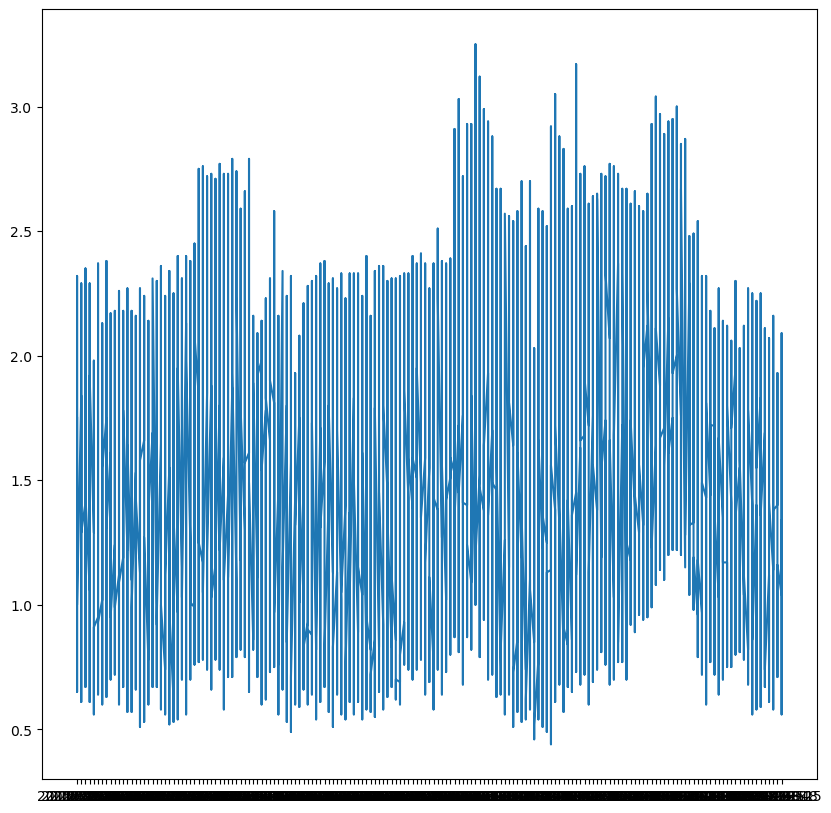

In [12]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df['Date'],avocado_df['AveragePrice'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'Plains'),
  Text(11, 0, 'SanFrancisco'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SouthCentral'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0, 'NewOrleansMobile'),
  Text(25, 0, 'Northeast'),
  Text(26, 0, 'North

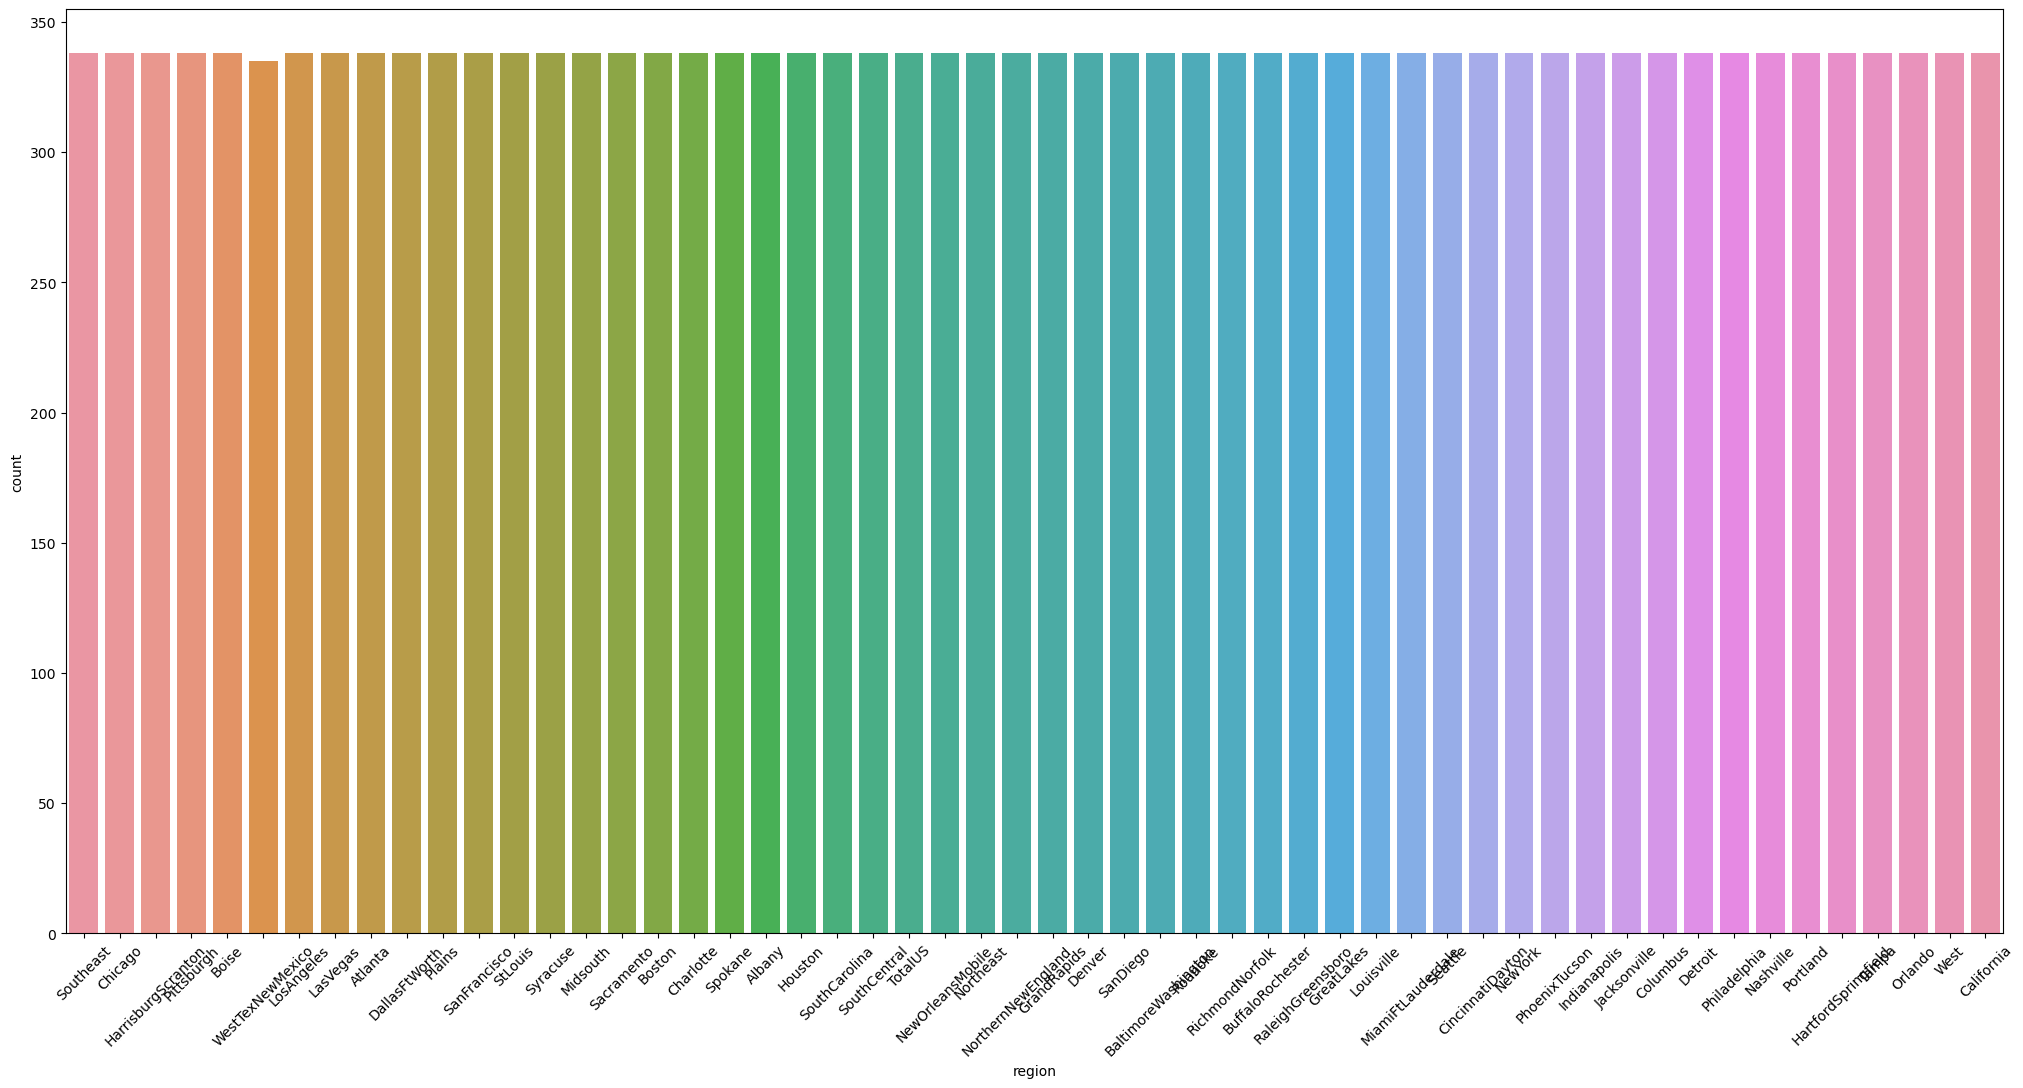

In [15]:
plt.figure(figsize=[25,12])
sns.countplot(x='region',data=avocado_df)
plt.xticks(rotation=45)

<Axes: xlabel='year', ylabel='count'>

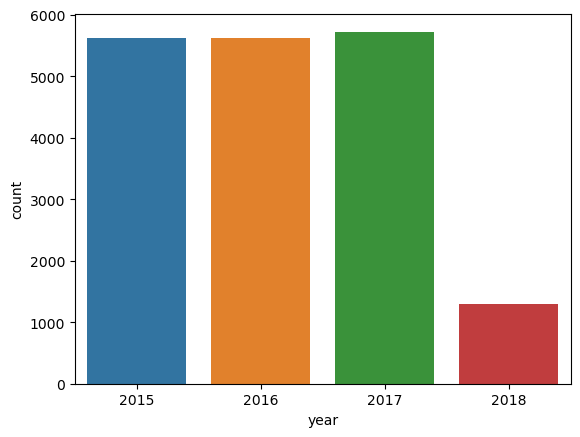

In [16]:
sns.countplot(x='year',data= avocado_df)

In [17]:
avocado_prophet_df = avocado_df[['Date','AveragePrice']]

In [18]:
avocado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
17625,2018-03-25,1.33
18033,2018-03-25,1.66


In [20]:
avocado_prophet_df= avocado_prophet_df.rename(columns={'Date':'ds','AveragePrice':'y'})

In [21]:
m = Prophet()

In [22]:
m.fit(avocado_prophet_df)

12:10:48 - cmdstanpy - INFO - Chain [1] start processing
12:10:53 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.499543,0.910108,1.859900,1.499543,1.499543,-0.114830,-0.114830,-0.114830,-0.114830,-0.114830,-0.114830,0.0,0.0,0.0,1.384714
1,2015-01-11,1.494298,0.944843,1.880605,1.494298,1.494298,-0.106478,-0.106478,-0.106478,-0.106478,-0.106478,-0.106478,0.0,0.0,0.0,1.387821
2,2015-01-18,1.489053,0.915566,1.870387,1.489053,1.489053,-0.106208,-0.106208,-0.106208,-0.106208,-0.106208,-0.106208,0.0,0.0,0.0,1.382845
3,2015-01-25,1.483808,0.838662,1.814277,1.483808,1.483808,-0.125207,-0.125207,-0.125207,-0.125207,-0.125207,-0.125207,0.0,0.0,0.0,1.358602
4,2015-02-01,1.478563,0.855305,1.821781,1.478563,1.478563,-0.153595,-0.153595,-0.153595,-0.153595,-0.153595,-0.153595,0.0,0.0,0.0,1.324969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.172539,0.569294,1.619714,1.000847,1.359627,-0.087367,-0.087367,-0.087367,-0.087367,-0.087367,-0.087367,0.0,0.0,0.0,1.085172
530,2019-03-22,1.171829,0.550883,1.606176,0.999331,1.359793,-0.085653,-0.085653,-0.085653,-0.085653,-0.085653,-0.085653,0.0,0.0,0.0,1.086176
531,2019-03-23,1.171119,0.580324,1.611995,0.997791,1.359958,-0.083662,-0.083662,-0.083662,-0.083662,-0.083662,-0.083662,0.0,0.0,0.0,1.087457
532,2019-03-24,1.170410,0.596542,1.603199,0.996562,1.360124,-0.081415,-0.081415,-0.081415,-0.081415,-0.081415,-0.081415,0.0,0.0,0.0,1.088995


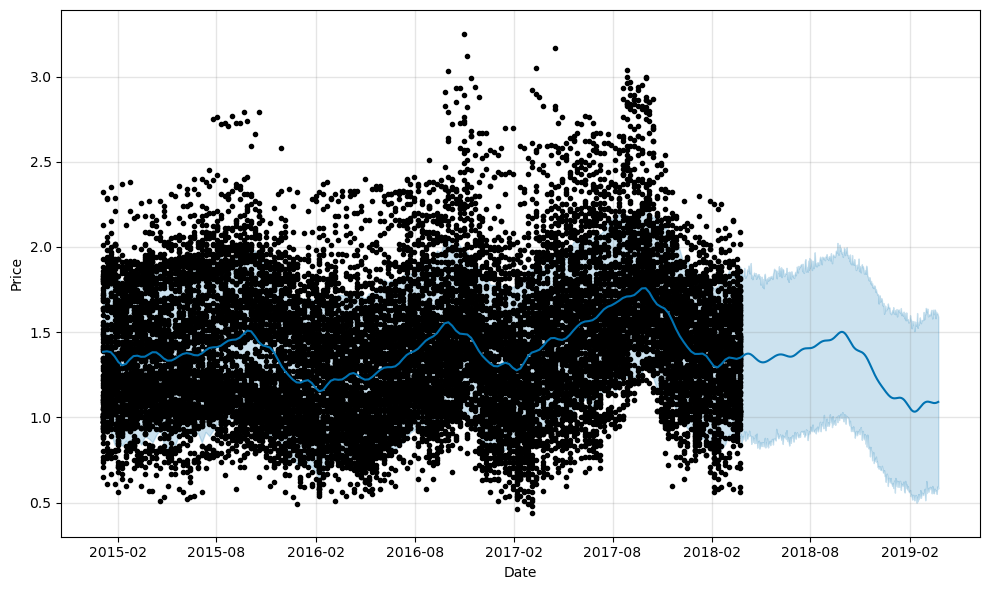

In [25]:
figure = m.plot(forecast,xlabel='Date',ylabel='Price')

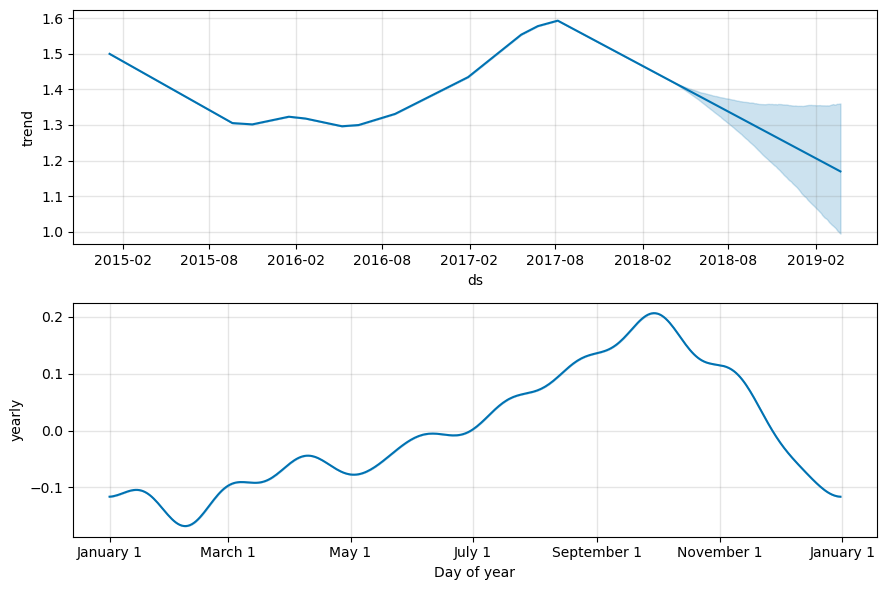

In [26]:
figure = m.plot_components(forecast)

In [27]:
avocado_df_sample = avocado_df[avocado_df['region'] == 'West']

In [28]:
avocado_df_sample

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11881,51,2015-01-04,1.40,187548.30,70313.71,72942.11,24.30,44268.18,10023.72,34244.46,0.00,organic,2015,West
2755,51,2015-01-04,0.89,5794410.58,2275446.87,2582300.65,97024.09,839638.97,688813.01,150819.57,6.39,conventional,2015,West
11880,50,2015-01-11,1.39,223156.55,80139.16,111395.01,63.88,31558.50,9296.76,22261.74,0.00,organic,2015,West
2754,50,2015-01-11,0.95,5333097.71,2203111.92,2292761.26,127412.09,709812.44,598705.08,111073.82,33.54,conventional,2015,West
2753,49,2015-01-18,0.96,5475363.01,2431736.63,2258069.63,76348.13,709208.62,527358.78,181809.88,39.96,conventional,2015,West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9104,2,2018-03-11,1.00,6906412.50,2442241.76,1695925.97,130983.00,2637261.77,1435608.59,1184730.56,16922.62,conventional,2018,West
18226,1,2018-03-18,1.73,210067.47,33437.98,47165.54,110.40,129353.55,73163.12,56020.24,170.19,organic,2018,West
9103,1,2018-03-18,0.99,7254940.65,2099082.66,1707752.84,115997.93,3332107.22,1333247.05,1982086.02,16774.15,conventional,2018,West
9102,0,2018-03-25,0.93,7667064.46,2567279.74,1912986.38,118289.91,3068508.43,1309580.19,1745630.06,13298.18,conventional,2018,West


In [29]:
avocado_df_sample = avocado_df_sample.sort_values('Date')

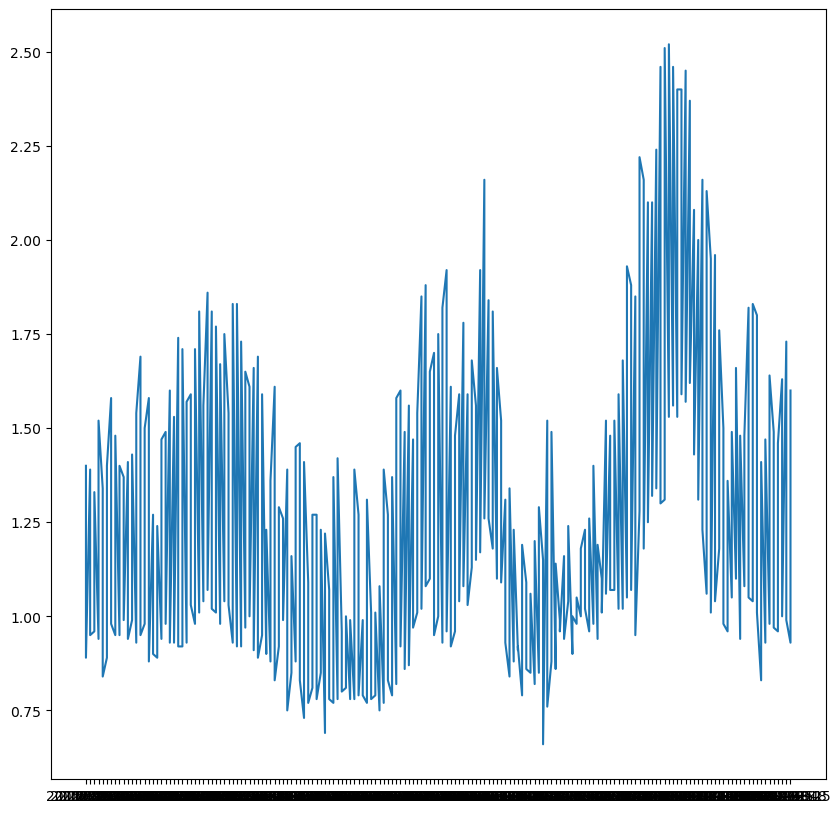

In [32]:
plt.figure(figsize=(10,10))
plt.plot(avocado_df_sample['Date'],avocado_df_sample['AveragePrice'])

In [36]:
avocado_df_sample= avocado_df_sample.rename(columns={'Date':'ds','AveragePrice':'y'})
n = Prophet()
n.fit(avocado_df_sample)
future_df_sample = n.make_future_dataframe(periods=365)
forecast_df_sample = n.predict(future_df_sample)
forecast_df_sample

05:19:09 - cmdstanpy - INFO - Chain [1] start processing
05:19:09 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.287566,0.682015,1.557356,1.287566,1.287566,-0.187725,-0.187725,-0.187725,-0.187725,-0.187725,-0.187725,0.0,0.0,0.0,1.099842
1,2015-01-11,1.285321,0.693476,1.555039,1.285321,1.285321,-0.171776,-0.171776,-0.171776,-0.171776,-0.171776,-0.171776,0.0,0.0,0.0,1.113545
2,2015-01-18,1.283076,0.699366,1.543010,1.283076,1.283076,-0.163259,-0.163259,-0.163259,-0.163259,-0.163259,-0.163259,0.0,0.0,0.0,1.119817
3,2015-01-25,1.280831,0.693958,1.534634,1.280831,1.280831,-0.174584,-0.174584,-0.174584,-0.174584,-0.174584,-0.174584,0.0,0.0,0.0,1.106247
4,2015-02-01,1.278586,0.681958,1.491808,1.278586,1.278586,-0.195594,-0.195594,-0.195594,-0.195594,-0.195594,-0.195594,0.0,0.0,0.0,1.082992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.725098,1.112630,1.941213,1.693301,1.760678,-0.207284,-0.207284,-0.207284,-0.207284,-0.207284,-0.207284,0.0,0.0,0.0,1.517814
530,2019-03-22,1.725657,1.110855,1.939917,1.693823,1.761227,-0.202276,-0.202276,-0.202276,-0.202276,-0.202276,-0.202276,0.0,0.0,0.0,1.523381
531,2019-03-23,1.726216,1.119407,1.988795,1.694202,1.761776,-0.196701,-0.196701,-0.196701,-0.196701,-0.196701,-0.196701,0.0,0.0,0.0,1.529514
532,2019-03-24,1.726775,1.119133,1.975020,1.694429,1.762453,-0.190664,-0.190664,-0.190664,-0.190664,-0.190664,-0.190664,0.0,0.0,0.0,1.536111


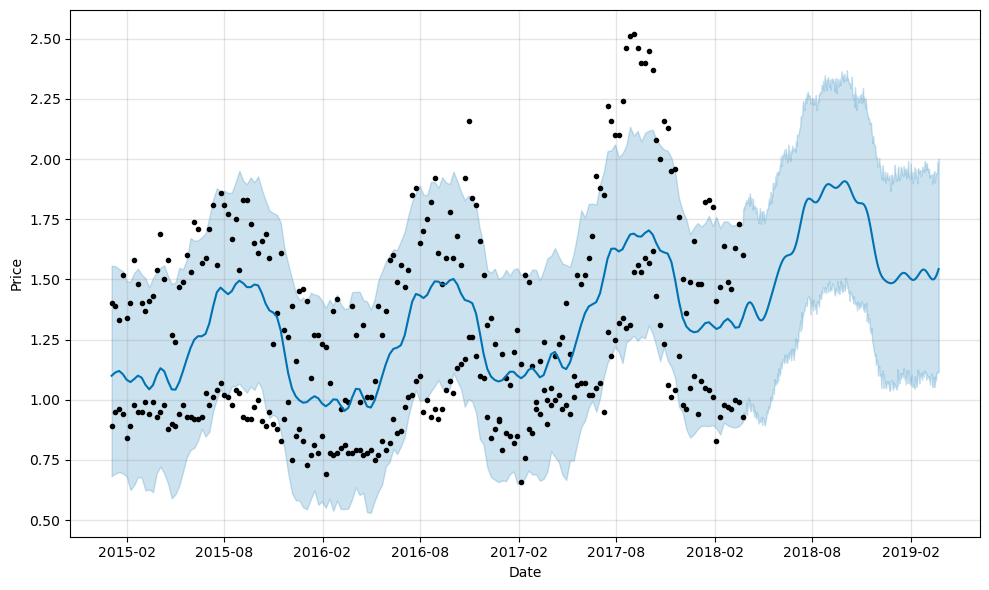

In [37]:
figure = n.plot(forecast_df_sample,xlabel='Date',ylabel='Price')

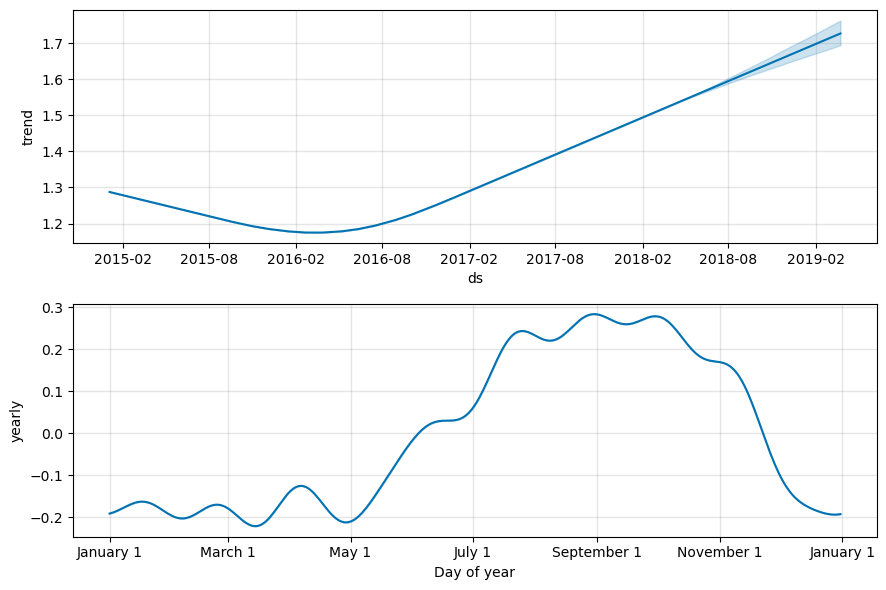

In [38]:
figure = n.plot_components(forecast_df_sample)